# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.098435e+01     7.612100e+00
 * time: 0.0019378662109375
     1     2.929302e+01     4.831548e+00
 * time: 0.007420778274536133
     2     2.015536e+01     3.822119e+00
 * time: 0.012372970581054688
     3     1.454682e+01     3.311485e+00
 * time: 0.016983985900878906
     4     1.433570e+01     3.899865e+00
 * time: 0.02057194709777832
     5     1.153952e+01     2.164123e+00
 * time: 0.02503180503845215
     6     1.013409e+01     2.351660e+00
 * time: 0.028531789779663086
     7     9.294646e+00     1.470827e+00
 * time: 0.07672476768493652
     8     8.903408e+00     8.440956e-01
 * time: 0.080474853515625
     9     8.692838e+00     8.076749e-01
 * time: 0.08402776718139648
    10     8.515056e+00     6.695767e-01
 * time: 0.08771395683288574
    11     8.352788e+00     5.449636e-01
 * time: 0.09163880348205566
    12     8.221490e+00     4.156603e-01
 * time: 0.0952599048614502
    13     8.146364e+00     6.115715e-01
 * time:

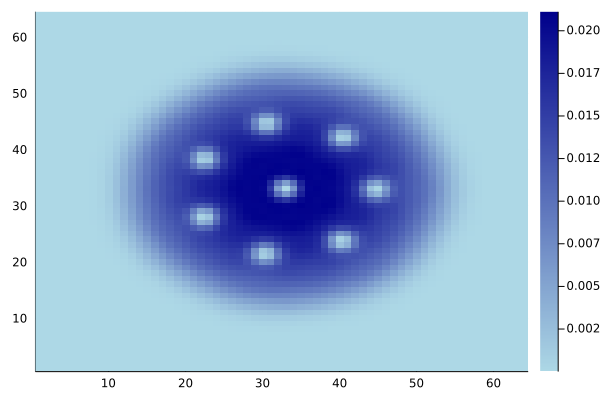

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)